# Do delays depend more on the destination or the departure?


## 1. Initial analysis


### Data Exploration and pre-processing


#### Load Datasets

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

flights_data = pd.read_csv('../flights.csv', low_memory=False)
airlines_data = pd.read_csv('../airlines.csv', low_memory=False)
airports_data = pd.read_csv('../airports.csv', low_memory=False)


#### Merge datasets based on common identifiers

In [3]:

merged_flights_data = flights_data.merge(airlines_data, left_on='AIRLINE', right_on='IATA_CODE', how='left')
merged_flights_data = merged_flights_data.merge(airports_data, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='left', suffixes=(None, '_DESTINATION'))
merged_flights_data = merged_flights_data.merge(airports_data, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='left', suffixes=(None, '_DEPARTURE'))

In [40]:
print(merged_flights_data.info())

   YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE_x  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4        AS             98      N407AS   
1  2015      1    1            4        AA           2336      N3KUAA   
2  2015      1    1            4        US            840      N171US   
3  2015      1    1            4        AA            258      N3HYAA   
4  2015      1    1            4        AS            135      N527AS   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  COUNTRY  \
0            ANC                 SEA                    5  ...      USA   
1            LAX                 PBI                   10  ...      USA   
2            SFO                 CLT                   20  ...      USA   
3            LAX                 MIA                   20  ...      USA   
4            SEA                 ANC                   25  ...      USA   

   LATITUDE  LONGITUDE  IATA_CODE_DEPARTURE  \
0  47.44898 -122.30931                  ANC   
1  26.68316  -80

#### Check if there is any missing value of Data Quality issues

In [41]:
print(merged_flights_data.isnull().sum())

YEAR                           0
MONTH                          0
DAY                            0
DAY_OF_WEEK                    0
AIRLINE_x                      0
FLIGHT_NUMBER                  0
TAIL_NUMBER                14721
ORIGIN_AIRPORT                 0
DESTINATION_AIRPORT            0
SCHEDULED_DEPARTURE            0
DEPARTURE_TIME             86153
DEPARTURE_DELAY            86153
TAXI_OUT                   89047
WHEELS_OFF                 89047
SCHEDULED_TIME                 6
ELAPSED_TIME              105071
AIR_TIME                  105071
DISTANCE                       0
WHEELS_ON                  92513
TAXI_IN                    92513
SCHEDULED_ARRIVAL              0
ARRIVAL_TIME               92513
ARRIVAL_DELAY             105071
DIVERTED                       0
CANCELLED                      0
CANCELLATION_REASON      5729195
AIR_SYSTEM_DELAY         4755640
SECURITY_DELAY           4755640
AIRLINE_DELAY            4755640
LATE_AIRCRAFT_DELAY      4755640
WEATHER_DE

#### Clean data - Remove missing values

In [4]:
merged_flights_data.dropna(subset=['DEPARTURE_DELAY', 'ARRIVAL_DELAY',
                    'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'], inplace=True)

### Analyzing Departure and Arrival Delays


#### Compute Flight Delays

In [5]:
avg_delay_by_departure_airport = merged_flights_data.groupby('IATA_CODE_DEPARTURE')['DEPARTURE_DELAY'].mean()
avg_delay_by_destination_airport = merged_flights_data.groupby('IATA_CODE_DESTINATION')['ARRIVAL_DELAY'].mean()


#### Analyze Flight Delays

In [6]:
print(avg_delay_by_departure_airport)
print(avg_delay_by_destination_airport)

IATA_CODE_DEPARTURE
ABE     8.687023
ABI     5.747647
ABQ     8.798552
ABR    10.101056
ABY     8.756351
         ...    
WRG     2.953775
WYS     1.375000
XNA    11.810889
YAK    -6.507692
YUM     1.232470
Name: DEPARTURE_DELAY, Length: 322, dtype: float64
IATA_CODE_DESTINATION
ABE    5.799099
ABI    4.081385
ABQ    5.614678
ABR   -3.389650
ABY    8.681713
         ...   
WRG    5.375767
WYS    4.193237
XNA    8.772090
YAK    0.371166
YUM    3.259159
Name: ARRIVAL_DELAY, Length: 322, dtype: float64


### Statistical Analysis


In [14]:
from scipy.stats import ttest_ind
# Perform paired t-test
t_statistic, p_value = stats.ttest_ind(avg_delay_by_departure_airport, avg_delay_by_destination_airport)

# Compare the p-value with the significance level (e.g., 0.05)
significance_level = 0.05
print("T statistic", t_statistic)
print("p-value", p_value)

if p_value < significance_level:
    print("There is a significant difference between delays at destination and departure.")
    if t_statistic > 0:
        print("Destination has higher delays on the average.")
    else:
        print("Departure has higher delays on the average.")
else:
    print("There is no significant difference between delays at destination and departure.")

T statistic 7.295061768883951
p-value 8.834125079117092e-13
There is a significant difference between delays at destination and departure.
Destination has higher delays on the average.


### Visualization


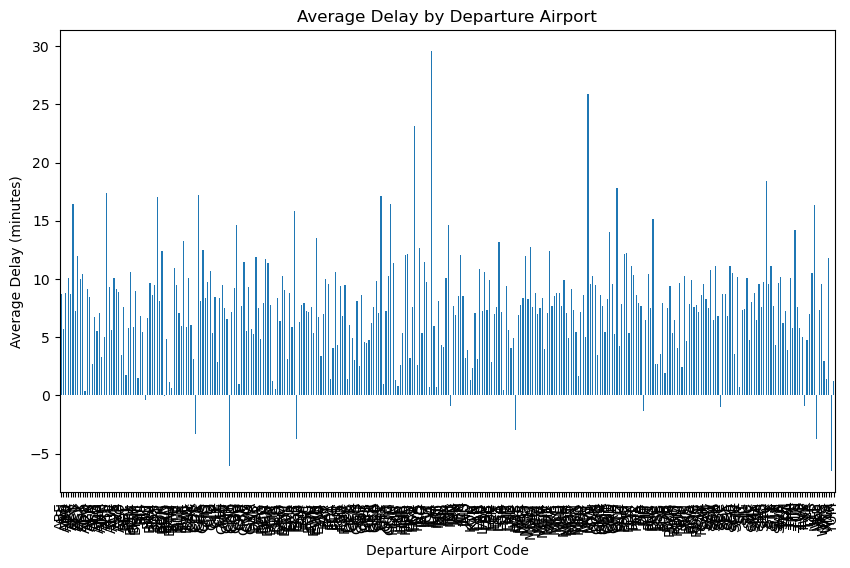

In [74]:
plt.figure(figsize=(10, 6))
avg_delay_by_departure_airport.plot(kind='bar')
plt.title('Average Delay by Departure Airport')
plt.xlabel('Departure Airport Code')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.show()


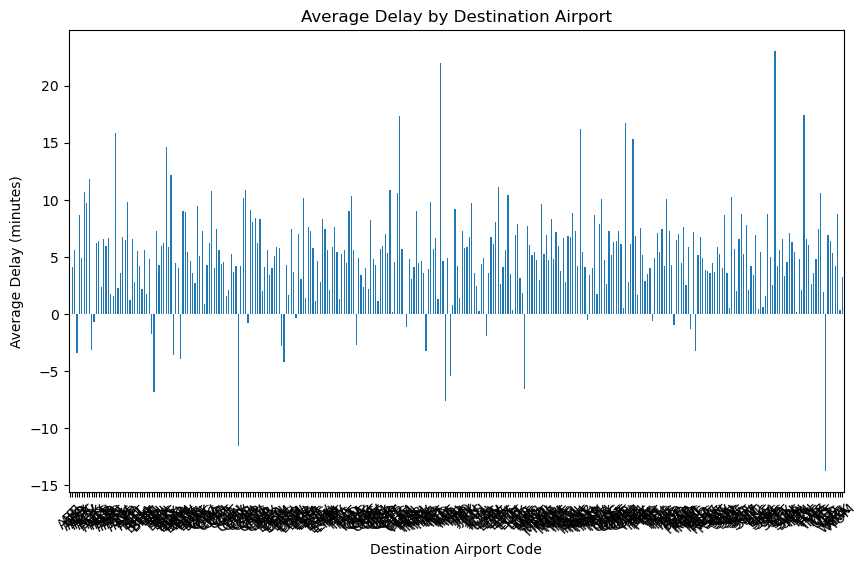

In [16]:
plt.figure(figsize=(10, 6))
avg_delay_by_destination_airport.plot(kind='bar')
plt.title('Average Delay by Destination Airport')
plt.xlabel('Destination Airport Code')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.show()

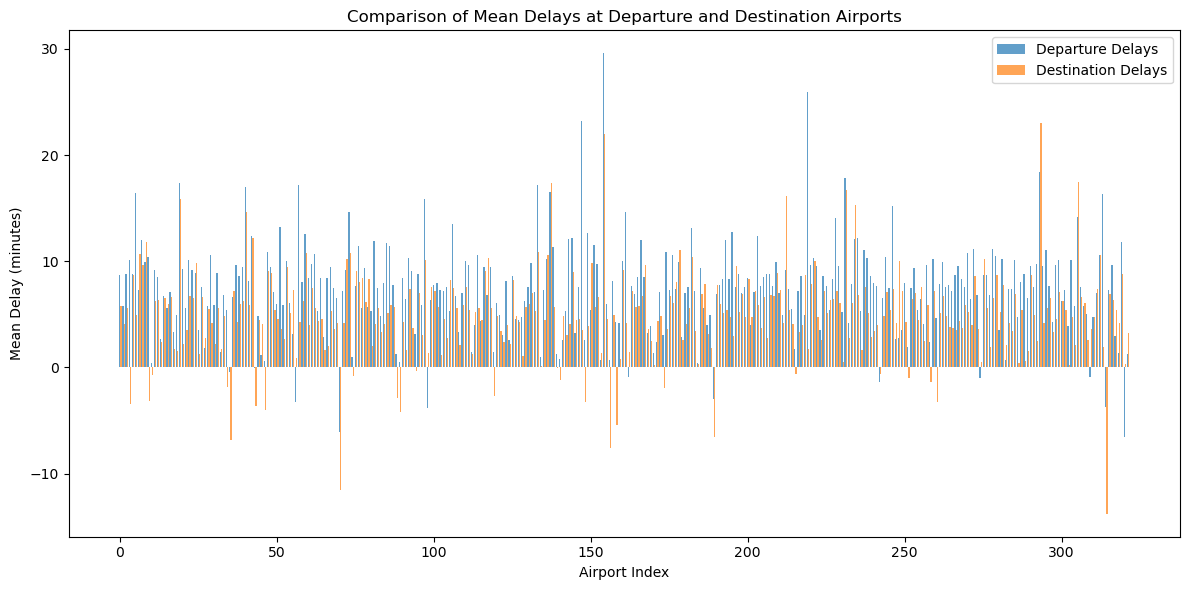

In [13]:
import seaborn as sns
import numpy as np
avg_delay_by_departure_airport = merged_flights_data.groupby('IATA_CODE_DEPARTURE')['DEPARTURE_DELAY'].mean()
avg_delay_by_destination_airport = merged_flights_data.groupby('IATA_CODE_DESTINATION')['ARRIVAL_DELAY'].mean()


# Extract the airport codes (index) and average delays
airport_codes = avg_delay_by_departure_airport.index
departure_delays = avg_delay_by_departure_airport.values
destination_delays = avg_delay_by_destination_airport.values


# Set the width of the bars and their positions
bar_width = 0.4
indices = np.arange(len(airport_codes))

# Create a grouped bar plot for average delays at departure and destination airports
plt.figure(figsize=(12, 6))
plt.bar(indices, departure_delays, bar_width, label='Departure Delays', alpha=0.7)
plt.bar(indices + bar_width, destination_delays, bar_width, label='Destination Delays', alpha=0.7)

plt.xlabel('Airport Index')  # X-axis label
plt.ylabel('Mean Delay (minutes)')  # Y-axis label
plt.title('Comparison of Mean Delays at Departure and Destination Airports')
#plt.xticks(indices + bar_width / 2, airport_codes, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


### Step 8: Conclusion

Since the p-value (8.834125079117092e-13) is much smaller than the significance level (α = 0.05), the null hypothesis rejected and there is a statistically significant difference between the means of delays at destination and departure at the 0.05 significance level.
